In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
from pycaret.classification import *
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

#this line is needed for matplotlib to show the histplot after df.hist
%matplotlib inline


warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# setting views for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# reading csv
df = pd.read_csv("./final.csv")
# dropping unwanted column
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df['Smash'].value_counts(normalize = True)

1    0.511111
0    0.488889
Name: Smash, dtype: float64

In [5]:
# initializing pycaret
exp_clf101 = setup(data = df, target = 'Smash', session_id=123)

,Description,Value
0,session_id,123
1,Target,Smash
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(90, 45)"
5,Missing Values,False
6,Numeric Features,44
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# comparing best models for classification
# train data results
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7214,0.7208,0.8333,0.7467,0.7651,0.4366,0.4594,0.0030
rf,Random Forest Classifier,0.7071,0.7847,0.8083,0.7417,0.7520,0.4074,0.4422,0.0400
lightgbm,Light Gradient Boosting Machine,0.6738,0.6694,0.7833,0.7233,0.7270,0.3491,0.3725,0.0110
et,Extra Trees Classifier,0.6595,0.7958,0.7750,0.7067,0.7031,0.3061,0.3349,0.0360
knn,K Neighbors Classifier,0.6548,0.7299,0.8833,0.6567,0.7427,0.2768,0.3051,0.2290
xgboost,Extreme Gradient Boosting,0.6548,0.7639,0.7750,0.6833,0.7127,0.2916,0.3208,0.0320
svm,SVM - Linear Kernel,0.6452,0.0000,0.7750,0.7100,0.6911,0.2690,0.2926,0.0050
dt,Decision Tree Classifier,0.6405,0.6458,0.7250,0.6900,0.6881,0.2960,0.2803,0.0030
lr,Logistic Regression,0.6286,0.6528,0.7250,0.6600,0.6709,0.2440,0.2562,0.4400
gbc,Gradient Boosting Classifier,0.6095,0.7472,0.7250,0.6383,0.6627,0.2156,0.2187,0.0140


In [7]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7214,0.7208,0.8333,0.7467,0.7651,0.4366,0.4594,0.0030
rf,Random Forest Classifier,0.7071,0.7847,0.8083,0.7417,0.7520,0.4074,0.4422,0.0420
lightgbm,Light Gradient Boosting Machine,0.6738,0.6694,0.7833,0.7233,0.7270,0.3491,0.3725,0.0110
et,Extra Trees Classifier,0.6595,0.7958,0.7750,0.7067,0.7031,0.3061,0.3349,0.0330
knn,K Neighbors Classifier,0.6548,0.7299,0.8833,0.6567,0.7427,0.2768,0.3051,0.0060
xgboost,Extreme Gradient Boosting,0.6548,0.7639,0.7750,0.6833,0.7127,0.2916,0.3208,0.0260
svm,SVM - Linear Kernel,0.6452,0.0000,0.7750,0.7100,0.6911,0.2690,0.2926,0.0050
dt,Decision Tree Classifier,0.6405,0.6458,0.7250,0.6900,0.6881,0.2960,0.2803,0.0030
lr,Logistic Regression,0.6286,0.6528,0.7250,0.6600,0.6709,0.2440,0.2562,0.0290
gbc,Gradient Boosting Classifier,0.6095,0.7472,0.7250,0.6383,0.6627,0.2156,0.2187,0.0140


In [8]:
# showing best model with hyperparameters
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [10]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,0.7500,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,0.5556,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071


In [12]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.8750,0.7500,0.7500,0.7500,0.2500,0.2500
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.5000,0.4444,0.6667,0.5000,0.5714,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
9,0.5000,0.7222,0.6667,0.5000,0.5714,0.0000,0.0000


In [13]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [14]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,0.7500,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,0.5556,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071


In [15]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.5000,0.7500,0.5000,0.6667,0.5714,0.0000,0.0000
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.7778,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.5000,0.5556,0.6667,0.5000,0.5714,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.4444,1.0000,0.5000,0.6667,0.0000,0.0000
9,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333


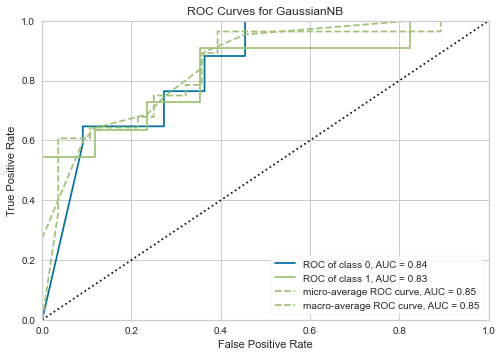

In [31]:
plot_model(nb, plot = 'auc')

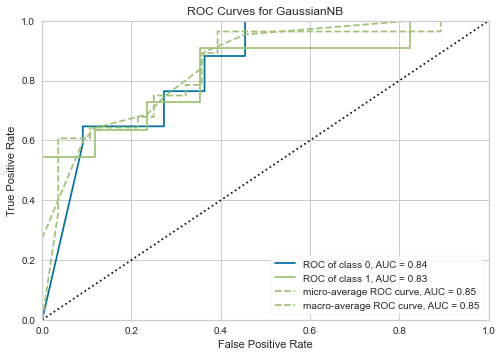

In [16]:
plot_model(tuned_nb, plot = 'auc')

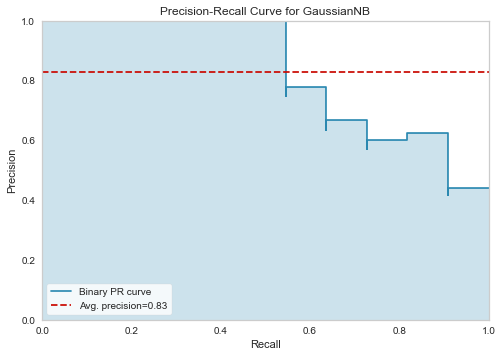

In [17]:
# plotting the precision recall curve
plot_model(tuned_nb, plot = 'pr')

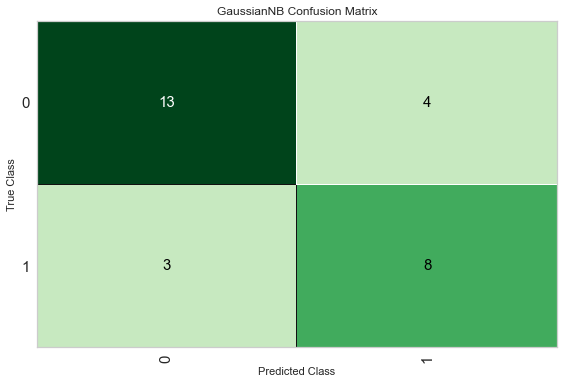

In [20]:
# plotting the confusion matrix
# false positives seem much lower than false negatives
plot_model(tuned_nb, plot = 'confusion_matrix')

In [21]:
# predicting using the test set
predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7500,0.8289,0.7273,0.6667,0.6957,0.4842,0.4855


,RW,LW,RE,LE,RS,RH,LH,RW^2,RW LW,RW RE,...,RS LH,LS^2,LS RH,LS LH,RH^2,RH LH,LH^2,Smash,Label,Score
0,160.910004,170.830002,153.149994,49.090000,6.260000,165.660004,140.910004,25892.027344,27488.255859,24643.367188,...,882.096619,1768.202515,6966.002930,5925.265625,27443.236328,23343.150391,19855.628906,0,0,1.0000
1,145.149994,167.820007,5.440000,99.339996,124.940002,150.139999,173.039993,21068.523438,24359.072266,789.616028,...,21619.617188,2.856100,253.736603,292.437592,22542.019531,25980.226562,29942.841797,0,0,1.0000
2,170.419998,175.139999,177.289993,86.000000,155.789993,176.020004,174.509995,29042.976562,29847.359375,30213.761719,...,27186.912109,35.402500,1047.318970,1038.334473,30983.041016,30717.250000,30453.740234,1,1,1.0000
3,157.000000,172.839996,110.430000,84.160004,101.290001,167.610001,160.440002,24649.000000,27135.880859,17337.509766,...,16250.967773,8.584900,491.097290,470.089203,28093.111328,26891.347656,25740.994141,0,0,0.9762
4,142.860001,161.259995,81.769997,47.080002,42.570000,77.690002,134.440002,20408.980469,23037.603516,11681.662109,...,5723.110840,1724.740845,3226.465820,5583.292969,6035.736328,10444.643555,18074.113281,0,0,1.0000
5,169.770004,166.630005,168.410004,154.130005,149.160004,172.529999,170.259995,28821.853516,28288.775391,28590.964844,...,25395.982422,4541.412109,11626.796875,11473.821289,29766.601562,29374.957031,28988.466797,1,0,1.0000
6,170.960007,149.130005,172.699997,101.150002,148.759995,171.470001,164.869995,29227.322266,25495.265625,29524.792969,...,24526.060547,0.532900,125.173103,120.355103,29401.960938,28270.259766,27182.117188,1,1,1.0000
7,161.179993,174.210007,160.130005,91.709999,176.039993,169.330002,170.279999,25978.992188,28079.167969,25809.753906,...,29976.091797,32184.359375,30377.802734,30548.232422,28672.648438,28833.511719,28995.279297,0,0,1.0000
8,173.479996,177.300003,166.309998,61.939999,6.250000,147.869995,151.869995,30095.310547,30758.003906,28851.458984,...,949.187500,3515.304199,8767.211914,9004.372070,21865.537109,22457.017578,23064.496094,0,0,1.0000
9,159.809998,170.500000,157.660004,122.209999,135.699997,171.410004,162.020004,25539.236328,27247.605469,25195.644531,...,21986.113281,341.140900,3165.942627,2992.509521,29381.388672,27771.847656,26250.480469,0,1,1.0000


# Let's try to run bagged trees

In [22]:
# running bagged decision tree
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,0.8333,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,0.7778,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
8,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071


In [24]:
# even increasing the estimators did not help in accuracy, in fact it reduced all the other scores
bagged_nb_nest = ensemble_model(nb, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,0.6667,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
8,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071


In [25]:
# checking results for bagged ET
# test set
predict_model(bagged_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7857,0.8930,0.8182,0.6923,0.7500,0.5648,0.5708


,RW,LW,RE,LE,RS,RH,LH,RW^2,RW LW,RW RE,...,RS LH,LS^2,LS RH,LS LH,RH^2,RH LH,LH^2,Smash,Label,Score
0,160.910004,170.830002,153.149994,49.090000,6.260000,165.660004,140.910004,25892.027344,27488.255859,24643.367188,...,882.096619,1768.202515,6966.002930,5925.265625,27443.236328,23343.150391,19855.628906,0,0,1.0000
1,145.149994,167.820007,5.440000,99.339996,124.940002,150.139999,173.039993,21068.523438,24359.072266,789.616028,...,21619.617188,2.856100,253.736603,292.437592,22542.019531,25980.226562,29942.841797,0,0,1.0000
2,170.419998,175.139999,177.289993,86.000000,155.789993,176.020004,174.509995,29042.976562,29847.359375,30213.761719,...,27186.912109,35.402500,1047.318970,1038.334473,30983.041016,30717.250000,30453.740234,1,1,1.0000
3,157.000000,172.839996,110.430000,84.160004,101.290001,167.610001,160.440002,24649.000000,27135.880859,17337.509766,...,16250.967773,8.584900,491.097290,470.089203,28093.111328,26891.347656,25740.994141,0,0,0.9949
4,142.860001,161.259995,81.769997,47.080002,42.570000,77.690002,134.440002,20408.980469,23037.603516,11681.662109,...,5723.110840,1724.740845,3226.465820,5583.292969,6035.736328,10444.643555,18074.113281,0,0,1.0000
5,169.770004,166.630005,168.410004,154.130005,149.160004,172.529999,170.259995,28821.853516,28288.775391,28590.964844,...,25395.982422,4541.412109,11626.796875,11473.821289,29766.601562,29374.957031,28988.466797,1,0,0.9993
6,170.960007,149.130005,172.699997,101.150002,148.759995,171.470001,164.869995,29227.322266,25495.265625,29524.792969,...,24526.060547,0.532900,125.173103,120.355103,29401.960938,28270.259766,27182.117188,1,1,1.0000
7,161.179993,174.210007,160.130005,91.709999,176.039993,169.330002,170.279999,25978.992188,28079.167969,25809.753906,...,29976.091797,32184.359375,30377.802734,30548.232422,28672.648438,28833.511719,28995.279297,0,0,1.0000
8,173.479996,177.300003,166.309998,61.939999,6.250000,147.869995,151.869995,30095.310547,30758.003906,28851.458984,...,949.187500,3515.304199,8767.211914,9004.372070,21865.537109,22457.017578,23064.496094,0,0,1.0000
9,159.809998,170.500000,157.660004,122.209999,135.699997,171.410004,162.020004,25539.236328,27247.605469,25195.644531,...,21986.113281,341.140900,3165.942627,2992.509521,29381.388672,27771.847656,26250.480469,0,1,0.9988


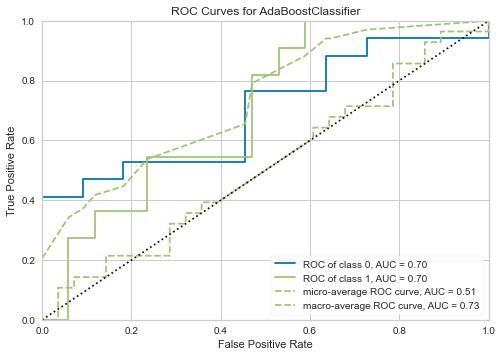

In [30]:
plot_model(boosted_nb, plot = 'auc')

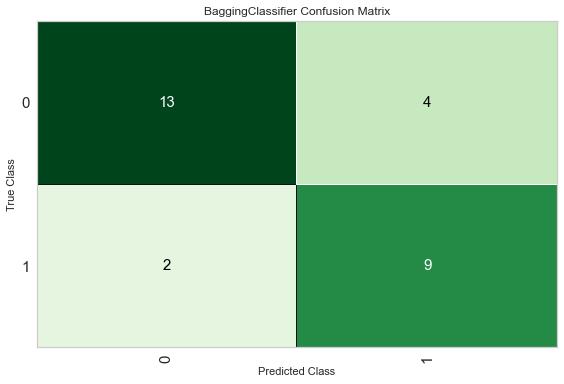

In [26]:
# plotting the confusion matrix
# false negatives seem much lower than false positives, and true positives had a slight increase
plot_model(bagged_nb, plot = 'confusion_matrix')

In [27]:
# check the parameters of bagged_et
print(bagged_nb)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=123, verbose=0,
                  warm_start=False)


# Attempting Extra trees for boosting

In [28]:
# Running boosted ET
# training results
boosted_nb = ensemble_model(nb, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4286,0.5833,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.4286,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5000,0.2500,0.2500,1.0000,0.4000,0.1818,0.3162
3,0.3333,0.8750,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.5000,0.5000,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
6,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
7,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
8,0.5000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.3333,0.3333,0.6667,0.4000,0.5000,-0.3333,-0.4472


In [29]:
boosted_nb_nest = ensemble_model(nb, method = 'Boosting', n_estimators=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
1,0.7143,0.8333,1.0000,0.6667,0.8000,0.3636,0.4714
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.3333,0.8750,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.3333,0.3750,0.2500,0.5000,0.3333,-0.2000,-0.2500
5,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
6,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
7,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
8,0.5000,0.3333,1.0000,0.5000,0.6667,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [32]:
# Seems like boosting on extra trees doesn't work well, let's move on

# Let's try model blending

In [33]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = True)
nb = create_model('nb', verbose = True)
rf = create_model('rf', verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.8750,0.7500,0.7500,0.7500,0.2500,0.2500
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.5000,0.4444,0.6667,0.5000,0.5714,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
9,0.5000,0.7222,0.6667,0.5000,0.5714,0.0000,0.0000


In [34]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, nb, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.6250,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.3750,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.5556,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071


In [35]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, nb, rf], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.7143,0.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.0000,0.7500,0.7500,0.7500,0.2500,0.2500
4,0.5000,0.0000,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.5000,0.0000,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,0.0000,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.6667,0.0000,1.0000,0.6000,0.7500,0.3333,0.4472
9,0.6667,0.0000,1.0000,0.6000,0.7500,0.3333,0.4472


In [36]:
# Seems like soft is better. And soft results are comparable to naive bayes alone

In [37]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.6250,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.3750,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.5556,0.6667,0.5000,0.5714,0.0000,0.0000
7,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071


In [38]:
predict_model(blender_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7500,0.8556,0.7273,0.6667,0.6957,0.4842,0.4855


,RW,LW,RE,LE,RS,RH,LH,RW^2,RW LW,RW RE,...,RS LH,LS^2,LS RH,LS LH,RH^2,RH LH,LH^2,Smash,Label,Score
0,160.910004,170.830002,153.149994,49.090000,6.260000,165.660004,140.910004,25892.027344,27488.255859,24643.367188,...,882.096619,1768.202515,6966.002930,5925.265625,27443.236328,23343.150391,19855.628906,0,0,0.9463
1,145.149994,167.820007,5.440000,99.339996,124.940002,150.139999,173.039993,21068.523438,24359.072266,789.616028,...,21619.617188,2.856100,253.736603,292.437592,22542.019531,25980.226562,29942.841797,0,0,0.7196
2,170.419998,175.139999,177.289993,86.000000,155.789993,176.020004,174.509995,29042.976562,29847.359375,30213.761719,...,27186.912109,35.402500,1047.318970,1038.334473,30983.041016,30717.250000,30453.740234,1,1,0.8692
3,157.000000,172.839996,110.430000,84.160004,101.290001,167.610001,160.440002,24649.000000,27135.880859,17337.509766,...,16250.967773,8.584900,491.097290,470.089203,28093.111328,26891.347656,25740.994141,0,0,0.8460
4,142.860001,161.259995,81.769997,47.080002,42.570000,77.690002,134.440002,20408.980469,23037.603516,11681.662109,...,5723.110840,1724.740845,3226.465820,5583.292969,6035.736328,10444.643555,18074.113281,0,0,0.9653
5,169.770004,166.630005,168.410004,154.130005,149.160004,172.529999,170.259995,28821.853516,28288.775391,28590.964844,...,25395.982422,4541.412109,11626.796875,11473.821289,29766.601562,29374.957031,28988.466797,1,0,0.8675
6,170.960007,149.130005,172.699997,101.150002,148.759995,171.470001,164.869995,29227.322266,25495.265625,29524.792969,...,24526.060547,0.532900,125.173103,120.355103,29401.960938,28270.259766,27182.117188,1,1,0.9481
7,161.179993,174.210007,160.130005,91.709999,176.039993,169.330002,170.279999,25978.992188,28079.167969,25809.753906,...,29976.091797,32184.359375,30377.802734,30548.232422,28672.648438,28833.511719,28995.279297,0,0,0.6773
8,173.479996,177.300003,166.309998,61.939999,6.250000,147.869995,151.869995,30095.310547,30758.003906,28851.458984,...,949.187500,3515.304199,8767.211914,9004.372070,21865.537109,22457.017578,23064.496094,0,0,0.9210
9,159.809998,170.500000,157.660004,122.209999,135.699997,171.410004,162.020004,25539.236328,27247.605469,25195.644531,...,21986.113281,341.140900,3165.942627,2992.509521,29381.388672,27771.847656,26250.480469,0,1,0.5368


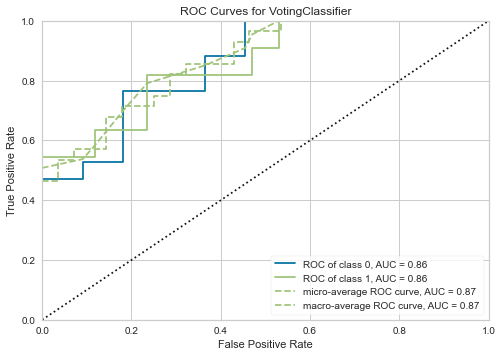

In [39]:
plot_model(blender_top3, plot = 'auc')

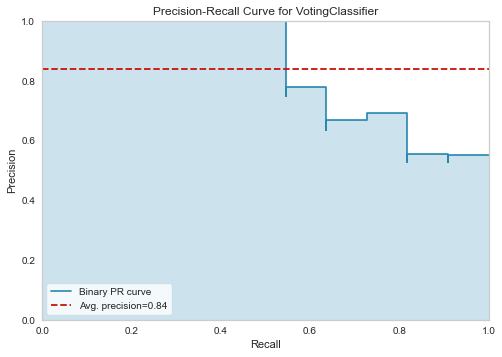

In [40]:
plot_model(blender_top3, plot = 'pr')

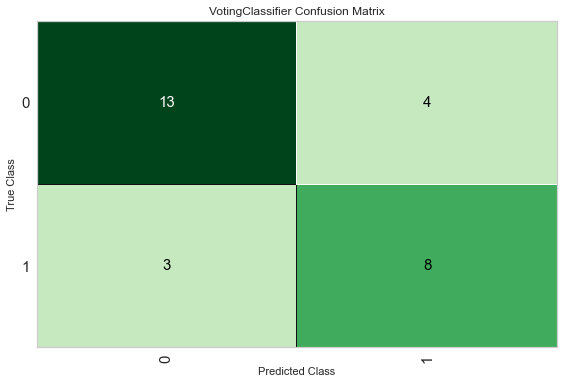

In [41]:
plot_model(blender_top3, plot = 'confusion_matrix')

In [42]:
# From the confusion matrix, it still feels like bagged trees produce stronger results

In [43]:
print(blender_top3.estimators_)

[GaussianNB(priors=None, var_smoothing=1e-09), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample

# Attemping XGBoost, and seeing whether it can beat bagged trees

In [45]:
df_xg = df.copy()

In [46]:
X = df_xg.drop(labels = ['Smash'], axis = 1)
y = df_xg['Smash']

In [47]:
# I'm not working with regression data, not much point to do a random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [48]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [49]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 100  # The number of training iterations

In [50]:
model = xgb.train(param, D_train, steps)

[10:36:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.825
Recall = 0.8376623376623377
Accuracy = 0.8333333333333334


# Trying with GridSearchCV

In [53]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7, 9 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

[10:44:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                  

In [54]:
# I think nevermind...
print(grid.best_score_)

-0.6460590224920048


# Based on the results, bagged trees are better as an overall score
![title](./Pics/bagged.jpg)

# For Prediction, also not too bad
![title](./Pics/baggedp.jpg)

In [55]:
save_model(bagged_nb,'Final Prediction Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Smash',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BaggingClassifier(base_estimator=GaussianNB(priors=None,
                 

In [116]:
# Just for fun, I want to try out tensorflow and see how strong the metrics are for binary classification
# I am going to try MLP for classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [107]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(72, 44) (18, 44) (72,) (18,)


In [108]:
n_features = X_train.shape[1]
n_features

44

In [120]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
# model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [128]:
# Setting Learning rate
opt = SGD(learning_rate=0.001,decay=1e-5)
# opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# opt = RMSprop()
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
model.fit(X_train, Y_train, epochs=150, verbose=1)

Epoch 1/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5417
Epoch 2/150
3/3 [==============================] - 0s 666us/step - loss: 0.6449 - accuracy: 0.5417
Epoch 3/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5417
Epoch 4/150
3/3 [==============================] - 0s 667us/step - loss: 0.6449 - accuracy: 0.5417
Epoch 5/150
3/3 [==============================] - 0s 667us/step - loss: 0.6449 - accuracy: 0.5417
Epoch 6/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5417
Epoch 7/150
3/3 [==============================] - 0s 667us/step - loss: 0.6449 - accuracy: 0.5417
Epoch 8/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5417
Epoch 9/150
3/3 [==============================] - 0s 998us/step - loss: 0.6449 - accuracy: 0.5417
Epoch 10/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5417
Epoch 11/150
3/3 [=

In [130]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.389


In [131]:
# Let's leave tensorflow alone for now. Seems like I am unable to increase my score through tensorflow

In [132]:
# I want to try the values without polynomial features, will that make the model give better results?

In [133]:
# reading csv
df = pd.read_csv("./Cleaned.csv")
# dropping unwanted column
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [134]:
df

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,1
...,...,...,...,...,...,...,...,...,...
85,170.60,164.07,142.84,123.65,146.38,20.43,174.01,160.91,0
86,142.86,161.26,81.77,47.08,42.57,41.53,77.69,134.44,0
87,147.28,172.66,1.24,63.21,20.74,31.36,167.47,158.90,0
88,167.43,144.55,98.49,58.09,24.56,34.18,162.35,122.77,0


In [135]:
# initializing pycaret
exp_clf101 = setup(data = df, target = 'Smash', session_id=123)

,Description,Value
0,session_id,123
1,Target,Smash
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(90, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [136]:
# comparing best models for classification
# train data results
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7381,0.7500,0.8000,0.7650,0.7639,0.4700,0.5001,0.0040
gbc,Gradient Boosting Classifier,0.7381,0.7653,0.8583,0.7500,0.7845,0.4559,0.4859,0.0100
nb,Naive Bayes,0.6905,0.7542,0.8000,0.7183,0.7349,0.3729,0.3951,0.0030
et,Extra Trees Classifier,0.6881,0.7931,0.8250,0.6917,0.7417,0.3559,0.3900,0.0360
xgboost,Extreme Gradient Boosting,0.6881,0.6778,0.8583,0.7017,0.7552,0.3654,0.3820,0.0330
ridge,Ridge Classifier,0.6714,0.0000,0.8583,0.6867,0.7456,0.3154,0.3393,0.0050
lda,Linear Discriminant Analysis,0.6714,0.7264,0.8583,0.6867,0.7456,0.3154,0.3393,0.0040
rf,Random Forest Classifier,0.6595,0.7625,0.8083,0.7017,0.7242,0.3021,0.3229,0.0430
lr,Logistic Regression,0.6571,0.6778,0.8083,0.6983,0.7198,0.3074,0.3309,0.4820
svm,SVM - Linear Kernel,0.6548,0.0000,0.7167,0.6700,0.6389,0.2701,0.3120,0.0040


In [137]:
# metrics do seem a bit better than adding polynomial features?
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,0.9167,0.5000,1.0000,0.6667,0.4615,0.5477
2,0.8333,0.5000,1.0000,0.8000,0.8889,0.5714,0.6325
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.7500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.7778,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
9,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000


In [138]:
print(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [139]:
tuned_qda = tune_model(qda)
# Seems like Tuning drops the metrics

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7143,0.9167,0.5000,1.0000,0.6667,0.4615,0.5477
2,0.8333,0.5000,1.0000,0.8000,0.8889,0.5714,0.6325
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.7500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.7778,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
8,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


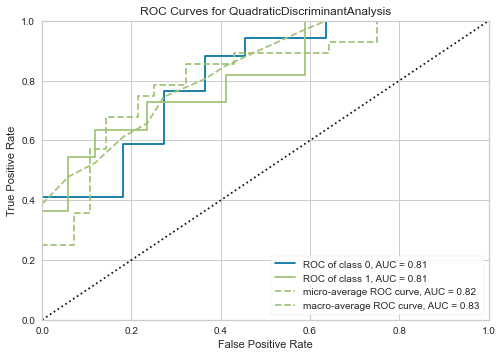

In [140]:
plot_model(qda, plot = 'auc')

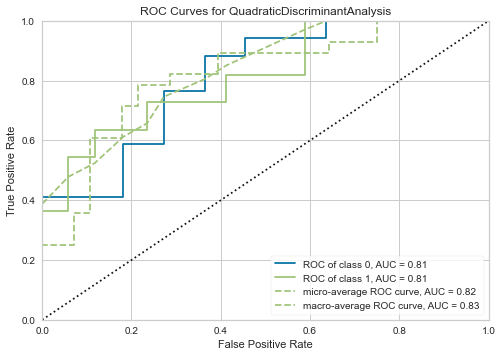

In [144]:
plot_model(tuned_qda, plot = 'auc')

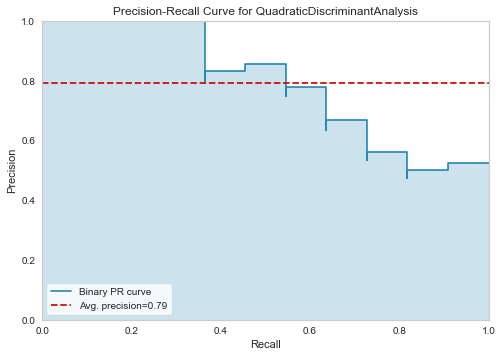

In [141]:
# plotting the precision recall curve
plot_model(qda, plot = 'pr')

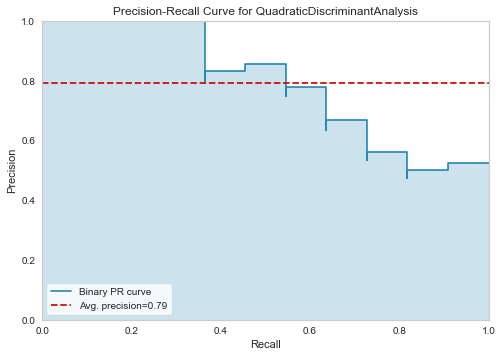

In [147]:
plot_model(tuned_qda, plot = 'pr')

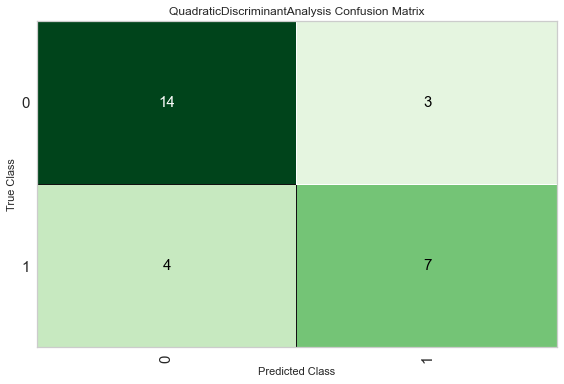

In [143]:
# plotting the confusion matrix
plot_model(qda, plot = 'confusion_matrix')

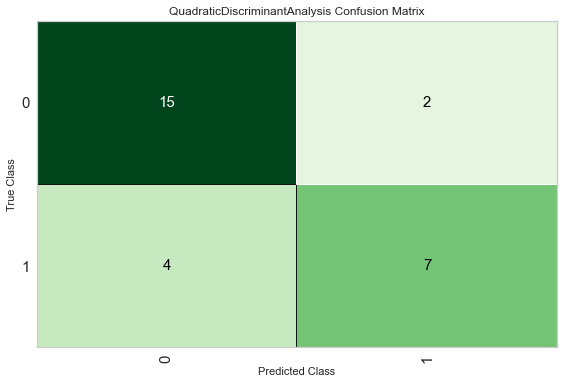

In [146]:
# plotting the confusion matrix
plot_model(tuned_qda, plot = 'confusion_matrix')

In [148]:
# predicting using the test set
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7857,0.8128,0.6364,0.7778,0.7000,0.5359,0.5424


,RW,LW,RE,LE,RS,LS,RH,LH,Smash,Label,Score
0,160.910004,170.830002,153.149994,49.090000,6.260000,42.049999,165.660004,140.910004,0,0,1.0000
1,145.149994,167.820007,5.440000,99.339996,124.940002,1.690000,150.139999,173.039993,0,0,0.8589
2,170.419998,175.139999,177.289993,86.000000,155.789993,5.950000,176.020004,174.509995,1,1,0.9190
3,157.000000,172.839996,110.430000,84.160004,101.290001,2.930000,167.610001,160.440002,0,0,0.9999
4,142.860001,161.259995,81.769997,47.080002,42.570000,41.529999,77.690002,134.440002,0,0,1.0000
5,169.770004,166.630005,168.410004,154.130005,149.160004,67.389999,172.529999,170.259995,1,0,0.8950
6,170.960007,149.130005,172.699997,101.150002,148.759995,0.730000,171.470001,164.869995,1,1,0.8712
7,161.179993,174.210007,160.130005,91.709999,176.039993,179.399994,169.330002,170.279999,0,0,1.0000
8,173.479996,177.300003,166.309998,61.939999,6.250000,59.290001,147.869995,151.869995,0,0,1.0000
9,159.809998,170.500000,157.660004,122.209999,135.699997,18.469999,171.410004,162.020004,0,1,0.6853


In [149]:
# running bagged decision tree
bagged_qda = ensemble_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
1,0.5714,1.0000,0.2500,1.0000,0.4000,0.2222,0.3536
2,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6667,0.5556,0.3333,1.0000,0.5000,0.3333,0.4472
9,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333


In [151]:
# running bagged decision tree
bagged_tuned_qda = ensemble_model(tuned_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
1,0.5714,1.0000,0.2500,1.0000,0.4000,0.2222,0.3536
2,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.8333,1.0000,0.7500,1.0000,0.8571,0.6667,0.7071
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


In [150]:
# even increasing the estimators did not help in accuracy, in fact it reduced all the other scores
bagged_qda_nest = ensemble_model(qda, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.5714,1.0000,0.2500,1.0000,0.4000,0.2222,0.3536
2,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


In [152]:
# train individual models to blend
qda = create_model('qda', verbose = False)
gbc = create_model('gbc', verbose = False)
et = create_model('et', verbose = False)

In [153]:
# blend individual models
blend_soft = blend_models(estimator_list = [qda, gbc, et], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.8571,1.0000,0.7500,1.0000,0.8571,0.7200,0.7500
2,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.2500,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
7,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.5000,0.7778,0.6667,0.5000,0.5714,0.0000,0.0000


In [154]:
# blend individual models
blend_hard = blend_models(estimator_list = [qda, gbc, et], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.0000,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.8571,0.0000,0.7500,1.0000,0.8571,0.7200,0.7500
2,0.8333,0.0000,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.8333,0.0000,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.5000,0.0000,0.5000,0.6667,0.5714,0.0000,0.0000
5,0.6667,0.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.0000,0.6667,0.6667,0.6667,0.3333,0.3333
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.0000,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.5000,0.0000,0.6667,0.5000,0.5714,0.0000,0.0000


In [155]:
# Seems like bagged is the best, let's run a predict model on bagged
predict_model(bagged_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7857,0.8396,0.5455,0.8571,0.6667,0.5200,0.5489


,RW,LW,RE,LE,RS,LS,RH,LH,Smash,Label,Score
0,160.910004,170.830002,153.149994,49.090000,6.260000,42.049999,165.660004,140.910004,0,0,0.9000
1,145.149994,167.820007,5.440000,99.339996,124.940002,1.690000,150.139999,173.039993,0,0,0.8773
2,170.419998,175.139999,177.289993,86.000000,155.789993,5.950000,176.020004,174.509995,1,1,0.5328
3,157.000000,172.839996,110.430000,84.160004,101.290001,2.930000,167.610001,160.440002,0,0,0.9986
4,142.860001,161.259995,81.769997,47.080002,42.570000,41.529999,77.690002,134.440002,0,0,0.9000
5,169.770004,166.630005,168.410004,154.130005,149.160004,67.389999,172.529999,170.259995,1,0,0.9427
6,170.960007,149.130005,172.699997,101.150002,148.759995,0.730000,171.470001,164.869995,1,1,0.5261
7,161.179993,174.210007,160.130005,91.709999,176.039993,179.399994,169.330002,170.279999,0,0,0.8000
8,173.479996,177.300003,166.309998,61.939999,6.250000,59.290001,147.869995,151.869995,0,0,1.0000
9,159.809998,170.500000,157.660004,122.209999,135.699997,18.469999,171.410004,162.020004,0,1,0.6219


In [156]:
save_model(bagged_qda,'FPModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Smash',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BaggingClassifier(base_estimator=QuadraticDiscriminantAnalysis(priors=None,
                                                                                